In [13]:

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import time
from collections import Counter
import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

#(빈)크롬창 열기
driver = webdriver.Chrome(ChromeDriverManager().install())

#네이버 지식인: 레드벨벳사진
driver.get("https://search.naver.com/search.naver?where=kin&sm=tab_jum&query=%EB%A0%88%EB%93%9C%EB%B2%A8%EB%B2%B3%EC%82%AC%EC%A7%84")
driver.maximize_window()
time.sleep(3)

#옵션 클릭
#opt = driver.find_element_by_css_selector('#snb > div.api_group_option_filter._search_option_simple_wrap > div > div.option_filter > a')
#opt.click()
#time.sleep(1)

#6개월 클릭
#month = driver.find_element_by_css_selector('#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.option > a:nth-child(7)')
#month.click()

all_contents_list=[]
while True:
    try:
        for i in range(1, 11):
            list = driver.find_element_by_css_selector(f"#main_pack > section.sc_new.sp_nkin._au_kin_collection > div > ul > li:nth-child({i}) > div > div.question_area > div.question_group > a")
            list.click()
            #time.sleep(1)
            
            driver.switch_to.window(driver.window_handles[1])
            #time.sleep(1)
                                                               
            #제목이랑 내용 함께 추출하고 싶을 때                                   
            all_contents=driver.find_elements_by_css_selector('#content > div.question-content > div')
            for j in all_contents:                              
                all_contents_list.append(j.text)
            #time.sleep(1)
            
            driver.close()
            #time.sleep(1)
            driver.switch_to.window(driver.window_handles[0])

                                                    
        next = driver.find_element_by_css_selector("#main_pack > div.api_sc_page_wrap > div > a.btn_next")
        next.click()

    except:
        break


In [14]:

#형태소 분석기를 통해 텍스트 정제하기
from konlpy.tag import Okt
okt=Okt()
import re

#필요없는 표시들 지우기
result_list =[]
for i in all_contents_list:
    result = i.replace("\n", "")
    result = result.replace('질문', '')
    result = result.replace('?', '')
    result = result.replace('나눈', '')
    result = result.replace('내공', '')
    result = result.replace('[', '')
    result = result.replace(']', '')
    result = result.replace('^', '')
    result = re.sub('ㅠ|ㅜ|ㅎ|ㅋ|ㅇ|!|~', '', result)
    
    #        정규표현식
    result = re.compile("태그\s디렉터리.+").sub("", result)
    result = re.compile("[a-zA-Z]").sub("", result)
    result_list.append(result)

result_list

['위너,엑소 사진 좀 주세요지금 현재 위너 사진, 엑소 사진 한 장도 없어서 말인데요 위너 사진, 엑소 사진 좀 부탁해요위너 사진은 남태현 위주로 많이 주시고, 엑소 사진은 찬열,백현,첸,시우민,레이,수호 위주로 많이주세요 그리고 위너 사진은 남태현 외에 다른 맴버 사진도 부탁해요♥',
 '엑소사진..엑소사진 멤버별로 진짜 엄청 마니마니마니마니 주세요채탁해드릴게용(당연히 첸하고 찬열은 빼고옹:))',
 '엑소 사진 많이 주세요최근 꺼들루요감시합니다',
 '엑소 사진 좀...엑소 사진 좀 찾아주세요밑에 사진은 움짤로 부탁드릴께요...엑소 개인별 사진하고 (움짤도 괜찮아요 ) 단체 사진 (9명) 고화질로 부탁드려요 ♥♥♥은 50 드릴께요♥♥(멤버 개인 사진은 희귀 사진인데 고화질로 부탁드려용><)',
 '엑소사진좀여..엑소 사진 좀 올려주세요단체도 좋고,개인도 좋아요.되도록이면 백현,세훈 사진으로요_',
 '엑소 사진 엑소 사진 희귀한것,이쁜것좀 주세요 30드려용',
 '엑소사진이 날아갔어요. 핸드폰이 부셔저서 엑소사진이 날아갔어요... 엑소사진좀 많이 올려주세요....흑',
 '엑소 사진 중에 뒷모습이나 얼굴이 자세히 안나온 사진들 있을까요이런 느낌이요 이왕이면 배경화면으로 쓸 수 있는 크기로요',
 '엑소사진좀…저가엑소사진이별로없어서…고화질이든화질구리든상관안합니다 엑소사진좀올려주세요',
 '엑소사진좀여 엑소에 빠진 학생인데요 엑소 사진좀 주세요',
 '엑소 사진좀 주세요..친구가 제 폰으로 게임한다고 가져가서 갤러리 보다가 엑소사진을 다 날려버렸네요.. 엑소 사진좀 주세요...  아 그 사진 5000개를 다 날려버려써요.. 걔가 아미인데 걔 핸폰에있는 방탄사진 다 삭제핳뻔했어요 제가 3년동안 모운건데.... 으아아ㅏ아ㅏ 아 서론이 노무 길었네요.. 아 엑소 사진좀 주세요은 넉넉하게 100++아 괜히 엑소가지고 욕하시늨분들 있던데 그런분들 바로 신고합니다.저번까지는 경고만 했는데 이제 바로 신고해요  최애랑차애 좀 알려주시면 안돠나요..뭐 이건 안알려주셔도되요

In [15]:
data = {'레드벨벳' : result_list}
df= pd.DataFrame(data)
df

,엑소
0,"위너,엑소 사진 좀 주세요지금 현재 위너 사진, 엑소 사진 한 장도 없어서 말인데요..."
1,엑소사진..엑소사진 멤버별로 진짜 엄청 마니마니마니마니 주세요채탁해드릴게용(당연히 ...
2,엑소 사진 많이 주세요최근 꺼들루요감시합니다
3,엑소 사진 좀...엑소 사진 좀 찾아주세요밑에 사진은 움짤로 부탁드릴께요...엑소 ...
4,"엑소사진좀여..엑소 사진 좀 올려주세요단체도 좋고,개인도 좋아요.되도록이면 백현,세..."
...,...
109,엑소사진엑소사진 ...... 멍멍이랑 어좁이 사진 올려주세염 또 요다 도요 절때 백...
110,엑소 사진 고화질 주세요엑소 사진 고화질 좀 주세요부탁드립니다♡경수 위주로 주시면 ...
111,틴탑사진이랑엑소사진좀요<30>틴탑사진이랑엑소사진좀요배경화면으로할사진이없어욤
112,엑소 사진엑소사진 좀여....


In [16]:
df.to_csv('레드벨벳.csv', encoding='utf-8-sig')

In [17]:
str = ''.join(result_list)
type(result_list), type(str)

(list, str)

In [18]:

#불용어 지우기
stopwords=['레드벨벳', '아이린', '웬디', '슬기', '조이', '예리']

#명사
def extract_tag(string):
    result_words=[]
    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:
        if tag in ['Noun']:
            if word not in stopwords:
                result_words.append(word)
    return result_words

#데이터타입 변경해준 result_list를 함수에 대입
text_data = extract_tag(str)

#빈도수 세기
count_n = Counter(text_data)

#빈출 단어 뽑기
count_n.most_common(20)

[('사진', 275),
 ('좀', 89),
 ('주시', 19),
 ('제', 17),
 ('고화질', 15),
 ('요', 13),
 ('움짤', 11),
 ('에리', 10),
 ('위주', 8),
 ('찬열', 8),
 ('백현', 8),
 ('개인', 8),
 ('폰', 8),
 ('팬', 8),
 ('디오', 8),
 ('것', 7),
 ('화질', 7),
 ('분', 7),
 ('최대한', 7),
 ('채택', 7)]

In [19]:
from wordcloud import WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

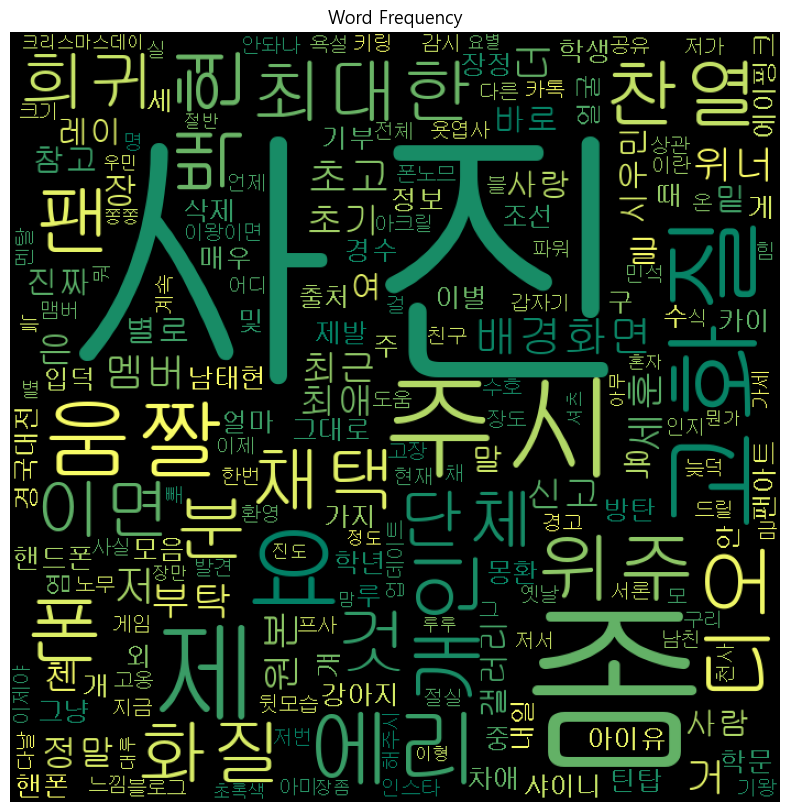

In [20]:

#워드클라우드
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc', width = 700, height = 700, background_color = 'black', 
                      colormap = 'summer', random_state =1).generate_from_frequencies(count_n)

#빈출단어 시각화
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size =13)
plt.show


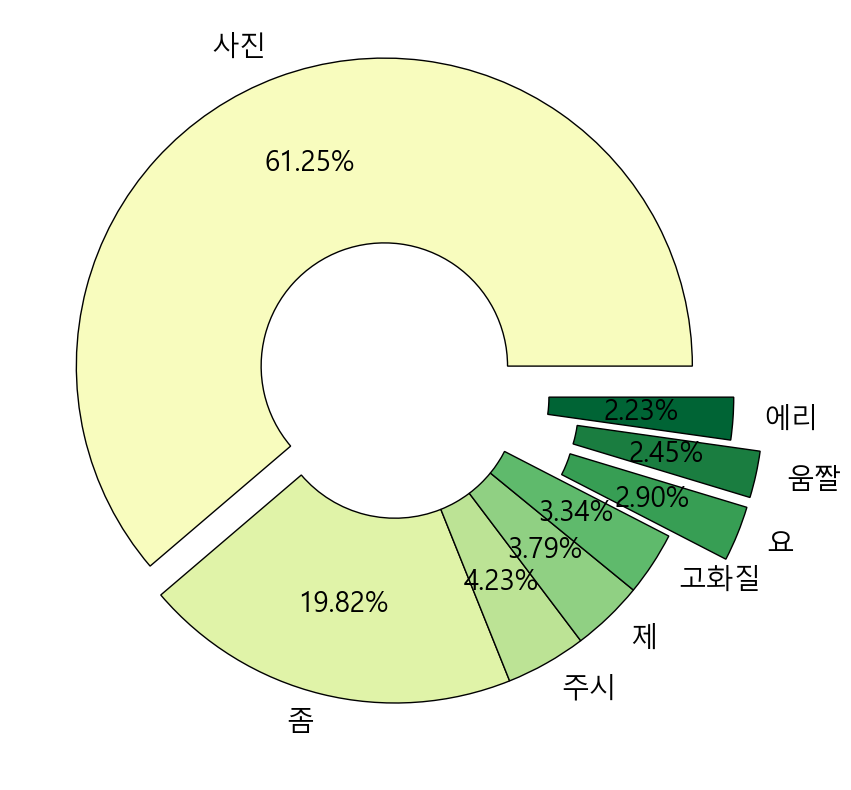

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

n=count_n.most_common(8)
n

df = pd.DataFrame(n, columns=['명사', '빈도수'])
wedgeprops={'width' : 0.6, 'edgecolor' : 'black', 'linewidth' : 1}
plt.figure(figsize=(10, 10))
colors=sns.color_palette('YlGn', len(df['명사']))
plt.pie(df['빈도수'], labels = df['명사'], textprops={'size' : 20}, autopct = '%0.2f%%', colors=colors, 
        explode = [0.1, 0, 0, 0, 0, 0.2, 0.2, 0.1], wedgeprops=wedgeprops, pctdistance = 0.7)

plt.show()

In [22]:
#불용어 지우기
stopwords=['있다', '하다', '되다', '돼다', '싶다', '보다', '해주다', '들다', '자다', '끄다', '오다', '가다', '이다',
           '찍다', '그려지다', '그리다', '이르다', '읽다', '겁니다', '파다', '저러다', '데리다', '달다', '날다',
           '따르다', '추다', '적히다', '끼다', '짜다', '비다']

#동사
def extract_tag2(string):
    result_words=[]
    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:
        if tag in ['Verb']:
            if word not in stopwords:
                result_words.append(word)
    return result_words

text_data = extract_tag2(str)

#빈도수 세기
count_v = Counter(text_data)

#빈출 단어 뽑기
v=count_v.most_common(20)
v

[('줄다', 58),
 ('올려주다', 17),
 ('감사하다', 16),
 ('나르다', 7),
 ('드리다', 6),
 ('사다', 6),
 ('말다', 4),
 ('찾다', 4),
 ('모으다', 4),
 ('날아가다', 3),
 ('빠지다', 3),
 ('버리다', 3),
 ('알다', 3),
 ('주다', 3),
 ('올리다', 3),
 ('걸다', 3),
 ('나오다', 2),
 ('쓸다', 2),
 ('써다', 2),
 ('않다', 2)]

<function matplotlib.pyplot.show(close=None, block=None)>

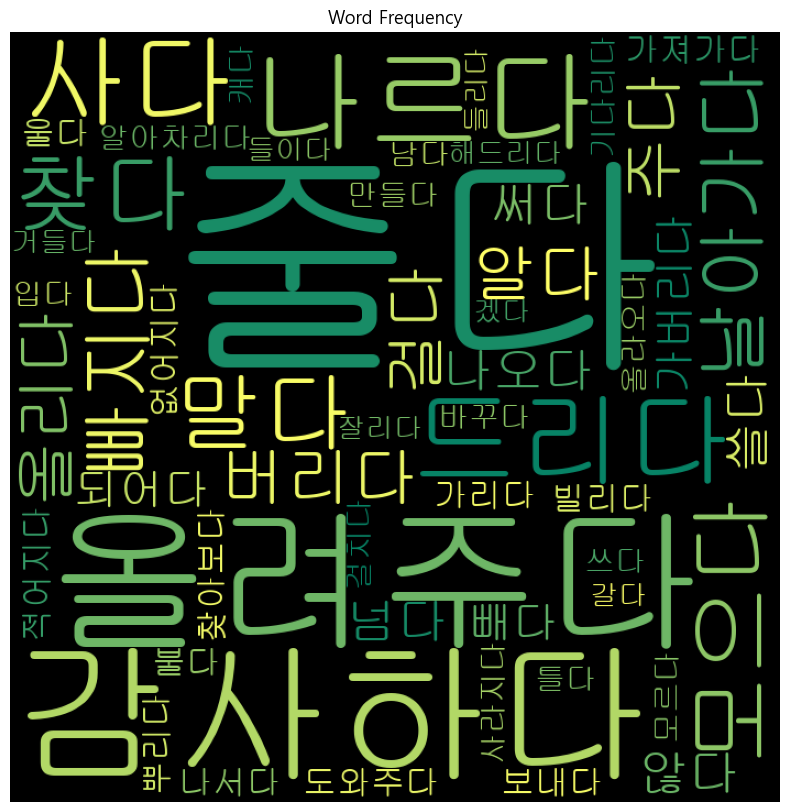

In [23]:

#워드클라우드
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc', width = 700, height = 700, background_color = 'black', 
                     colormap = 'summer', random_state =1).generate_from_frequencies(count_v)

#빈출단어 시각화
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size =13)
plt.show

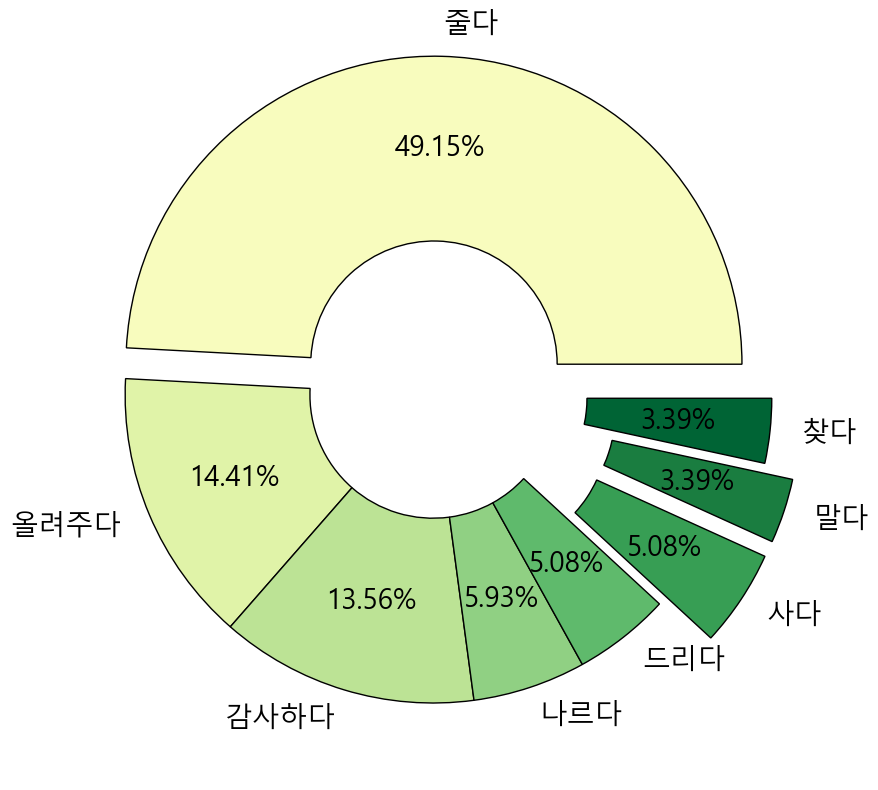

In [24]:
v=count_v.most_common(8)

df = pd.DataFrame(v, columns=['동사', '빈도수'])

colors=sns.color_palette('YlGn', len(df['동사']))

plt.figure(figsize=(10, 10))

plt.pie(df['빈도수'], labels = df['동사'], textprops={'size' : 20}, autopct = '%0.2f%%', colors=colors, 
        explode = [0.1, 0, 0, 0, 0, 0.2, 0.2, 0.1], wedgeprops=wedgeprops, pctdistance = 0.7)


plt.show()
#plt.savefig('verb_pie.png')